In [1]:
import config, src
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight

In [2]:
data = src.load_data(config.PROCESSED_DATA_FILE)
X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

Données chargées avec succès.


In [3]:
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.455
Global log loss : 19.344628773939174
Global precision : 0.45545116595854845
Global recall : 0.4559549919233213
Global F1 score : 0.4554456508745705
Global ROC-AUC score : 0.7011834180132256

              Precision    Recall  F1 score
Alternative   0.323647  0.320437  0.322034
Anime         0.657614  0.655706  0.656659
Blues         0.429711  0.422135  0.425889
Classical     0.716202  0.726702  0.721414
Country       0.428027  0.455375  0.441278
Electronic    0.503914  0.510406  0.507139
Hip-Hop       0.344891  0.379899  0.361549
Jazz          0.387130  0.384772  0.385947
Rap           0.306806  0.284466  0.295214
Rock          0.456570  0.419652  0.437333

----------------------------------------------------------------------------------------------------


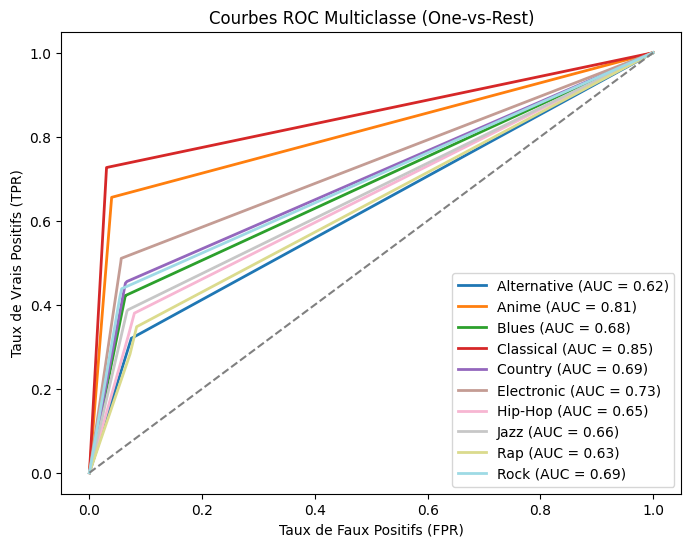

----------------------------------------------------------------------------------------------------


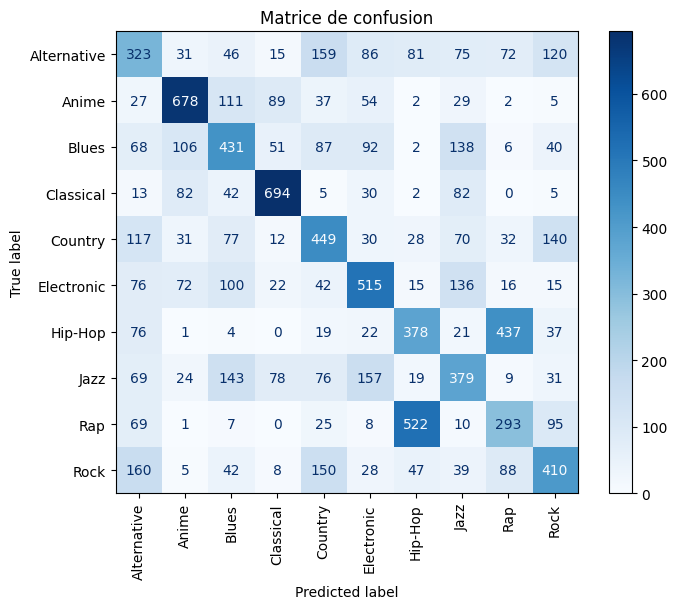

----------------------------------------------------------------------------------------------------


In [4]:
src.evaluate_model(dt_classifier, X_test, y_test, classes= config.CLASSES)

In [5]:
data = src.load_data(config.PROCESSED_DATA_FOLDER + 'processed_data_combined_rap_hiphop.csv')

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight = dict(zip(np.unique(y_train), class_weight))

Données chargées avec succès.


In [6]:
dt_classifier = DecisionTreeClassifier(random_state=0, class_weight=class_weight)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={np.int64(0): np.float64(1.11333778668448),
                                     np.int64(1): np.float64(1.120636521544237),
                                     np.int64(2): np.float64(1.116975231074251),
                                     np.int64(3): np.float64(1.0987501716797143),
                                     np.int64(4): np.float64(1.107235785860599),
                                     np.int64(5): np.float64(1.113616748795902),
                                     np.int64(6): np.float64(1.1069600110696),
                                     np.int64(7): np.float64(0.557297109021247),
                                     np.int64(8): np.float64(1.104758748308338)},
                       random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.546
Global log loss : 16.27293317492916
Global precision : 0.5191157658456207
Global recall : 0.5183205978835229
Global F1 score : 0.5186384127237048
Global ROC-AUC score : 0.7319961957397965

              Precision    Recall  F1 score
Alternative   0.316206  0.317460  0.316832
Anime         0.666667  0.665377  0.666021
Blues         0.425552  0.433888  0.429680
Classical     0.744385  0.728796  0.736508
Country       0.417881  0.436105  0.426799
Electronic    0.488759  0.495540  0.492126
Jazz          0.398398  0.404061  0.401210
Rap/Hip-Hop   0.797708  0.790617  0.794147
Rock          0.416486  0.393040  0.404423

----------------------------------------------------------------------------------------------------


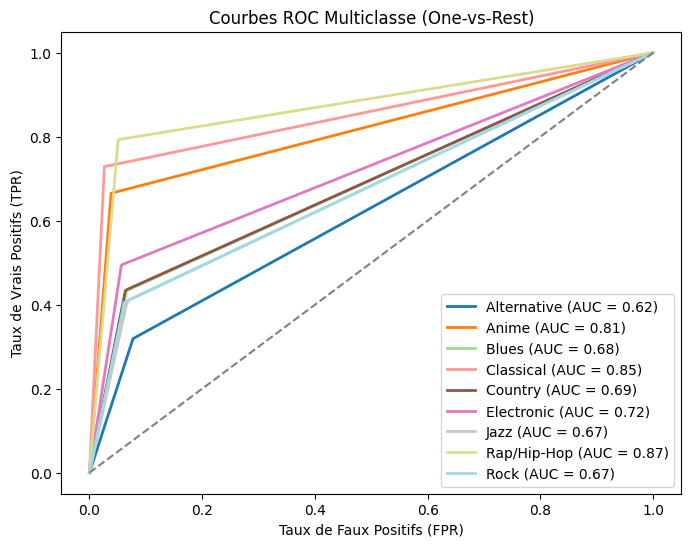

----------------------------------------------------------------------------------------------------


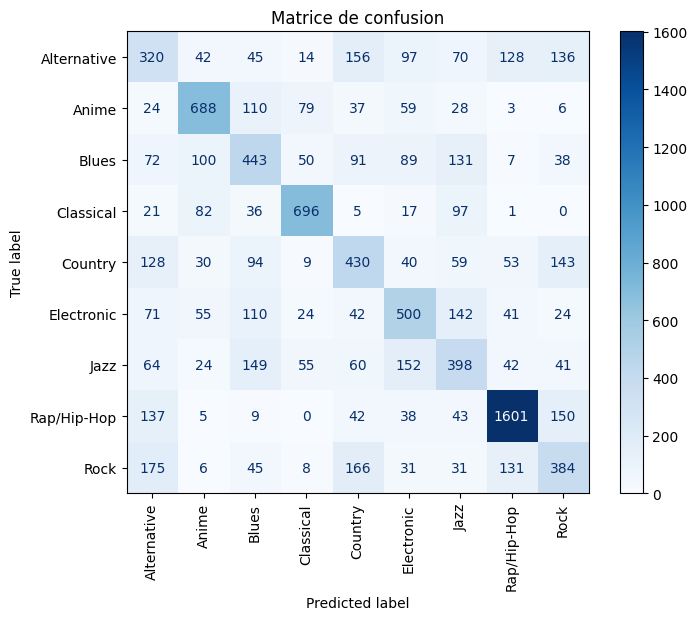

----------------------------------------------------------------------------------------------------


In [7]:
src.evaluate_model(dt_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

In [8]:
data = src.load_data(config.PROCESSED_DATA_FOLDER + 'processed_data_combined_rap_hiphop_no_keys.csv')
X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

Données chargées avec succès.


In [9]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

dt_classifier = DecisionTreeClassifier(random_state=0, class_weight=dict(zip(np.unique(y_train), class_weights)))
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={np.int64(0): np.float64(1.11333778668448),
                                     np.int64(1): np.float64(1.120636521544237),
                                     np.int64(2): np.float64(1.116975231074251),
                                     np.int64(3): np.float64(1.0987501716797143),
                                     np.int64(4): np.float64(1.107235785860599),
                                     np.int64(5): np.float64(1.113616748795902),
                                     np.int64(6): np.float64(1.1069600110696),
                                     np.int64(7): np.float64(0.557297109021247),
                                     np.int64(8): np.float64(1.104758748308338)},
                       random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.5487
Global log loss : 16.186467825198267
Global precision : 0.5198986807162305
Global recall : 0.5206677434141376
Global F1 score : 0.5202233052028168
Global ROC-AUC score : 0.7331379425825225

              Precision    Recall  F1 score
Alternative   0.314000  0.311508  0.312749
Anime         0.661321  0.677950  0.669532
Blues         0.433040  0.433888  0.433464
Classical     0.724790  0.722513  0.723650
Country       0.431774  0.449290  0.440358
Electronic    0.487757  0.493558  0.490640
Jazz          0.404343  0.396954  0.400615
Rap/Hip-Hop   0.799603  0.796049  0.797822
Rock          0.422460  0.404299  0.413180

----------------------------------------------------------------------------------------------------


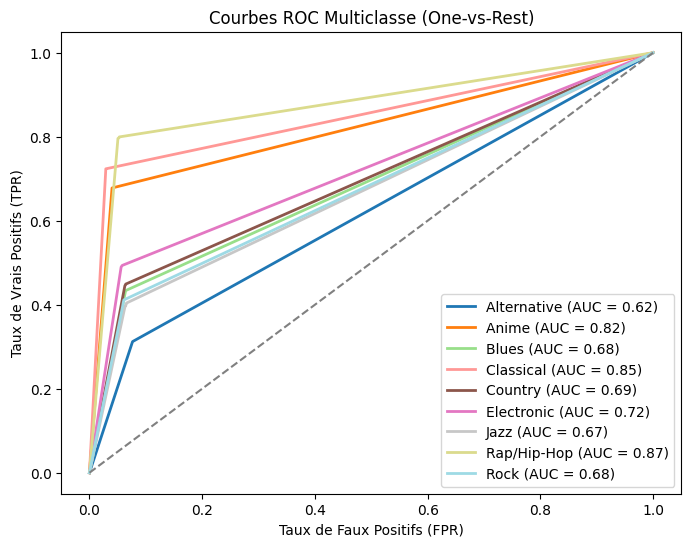

----------------------------------------------------------------------------------------------------


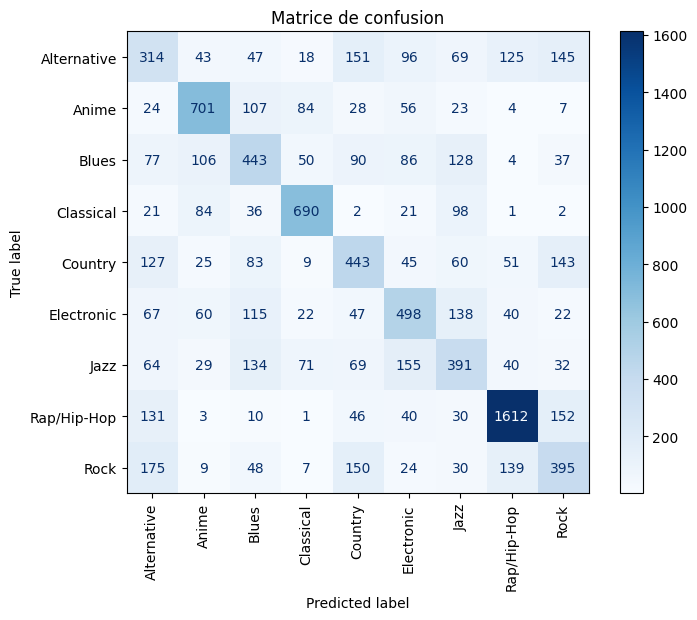

----------------------------------------------------------------------------------------------------


In [10]:
src.evaluate_model(dt_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)